# Implementacón de PCA

Imaginemos por un momento que la librería [scikit-learn](https://scikit-learn.org/stable/) no tiene implementado el algoritmo Principal Component Analysis (PCA). Si quisiéramos aplicar el algoritmo, tendríamos que implementarlo nosotros mismos. Al mismo tiempo, imaginemos que otros algoritmos que quisiéramos usar si están implementados en la libería, por lo cual sería bastante conveniente que nuestra implementación de PCA tuviera una interfaz muy similar a la que tienen otras implementaciones en scikit-learn.

A continuación encontrarás una definición de la clase PCA, reemplaza el `raise NotImplementedError` por una implementadicón correcta. Mas adelante, deberás usar esta implementación para representar en 2 dimensiones dataset iris.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris

%matplotlib inline
np.random.seed(1234)

In [176]:

class PCA(TransformerMixin, BaseEstimator):
    """Principal component analysis (PCA).
    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space. The input data is centered
    but not scaled for each feature before applying the SVD.
    
    Parameters
    ----------
    n_components : int
        Number of components to keep.

    """
    
    def __init__(self, n_components):
        self.n_components=n_components
        
    def fit(self, X, y=None):
        """Fit the model with X.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : Ignored

        Returns
        -------
        self : object
            Returns the instance itself.
        """

        if self.n_components is None:
          n_componets = X.shape[1]
        else:
          n_componets = self.n_components
        
        self.meaned_ = (X- np.mean(X,axis=0))
        self.X_mean_ = np.mean(X, axis=0)

        cov_max = np.cov(self.meaned_.T)
        eigen_values , eigen_vectors = np.linalg.eigh(cov_max)
        e_ind_order = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[e_ind_order]
        sorted_eigenvectors = eigen_vectors[:,e_ind_order]
        self.W_ = sorted_eigenvectors[:,0:n_componets]

        return self

        
    def transform(self, X):
        """Apply dimensionality reduction to X.
        X is projected on the first principal components previously extracted
        from a training set.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples is the number of samples
            and n_features is the number of features.
            
        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)
        
        """
        return np.dot(self.meaned_,self.W_)

In [174]:
iris = load_iris()

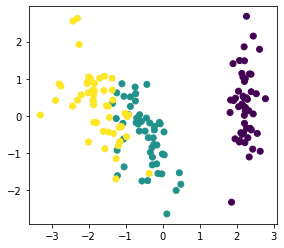

In [175]:
pca = PCA(n_components=2)
Z = pca.transform(pca.fit(iris.data))
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [177]:
from sklearn.decomposition import PCA

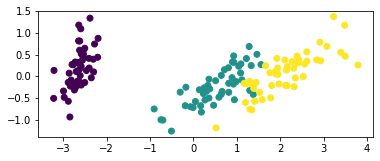

In [178]:
pca_2 = PCA(n_components=2,svd_solver='full')
Z = pca_2.fit_transform(iris.data)
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()